In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()
import pickle

In [2]:
df=pd.read_excel(r'C:\Users\prana\Downloads\Pranav_New\Data_Train.xlsx')

In [3]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
 pd.set_option('display.max_columns',None)

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.shape

(10683, 11)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(10682, 11)

In [10]:
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [11]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [12]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [13]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [14]:
### Preprcessing for Data_of_Journey
df['Day_of_Journey']=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y" ).dt.day
df['Month_of_Journey']=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y" ).dt.month
#df['Day_of_week']=pd.to_datetime(df.Date_of_Journey, format="%d/%m/%Y" ).dt.dayofweek
df.drop(['Date_of_Journey'],axis=1,inplace=True)


In [15]:
###Preprcessing for Dept time
df['Dep_Hour']=pd.to_datetime(df['Dep_Time'] ).dt.hour
df['Dep_Min']=pd.to_datetime(df['Dep_Time'] ).dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)

In [16]:
##Preprocessing for Arrival Time
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time'] ).dt.hour
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time'] ).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [17]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [18]:
## Preprocessing for Duration
new = df['Duration'].str.split(" ", n = 2, expand = True)
  # making separate Hours column from new data frame
df["Duration_Hours"]= new[0]
  # making separate Minutes column from new data frame
df["Duration_Minutes"]= new[1]
#Removing letters from string
df["Duration_Hours"] = df["Duration_Hours"].str.replace(r'\D', '')
df["Duration_Minutes"] = df["Duration_Minutes"].str.replace(r'\D', '')

<ipython-input-18-227878236e93>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Duration_Hours"] = df["Duration_Hours"].str.replace(r'\D', '')
<ipython-input-18-227878236e93>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Duration_Minutes"] = df["Duration_Minutes"].str.replace(r'\D', '')


In [19]:
df['Duration_Minutes'] = df['Duration_Minutes'].fillna(0)
df["Duration_Hours"] = df["Duration_Hours"].astype(int)
df["Duration_Minutes"] = df["Duration_Minutes"].astype(int)
df.drop(["Duration"], axis = 1, inplace = True)

In [20]:
df.head(5)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Nominal data --> Data not in order -->OneHotEncoder is used
# Ordinal data --> Data in order -->LabelEncode is used

In [21]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
df.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [23]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [24]:
df['Total_Stops']=df['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [25]:
df_Airline=pd.get_dummies(df['Airline'], prefix="Airline")
df_Source=pd.get_dummies(df['Source'], prefix="Source")
df_Destination=pd.get_dummies(df['Destination'], prefix="Destination")
df = pd.concat([df, df_Airline,df_Source,df_Destination ], axis=1)
df.drop(['Airline','Destination','Source'],axis=1,inplace=True)

In [26]:
df.head(4)

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [27]:
df.columns

Index(['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [28]:
df_for_corr=df[['Total_Stops', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]

In [29]:
df.shape

(10682, 33)

# Test Data 

In [30]:
df_test=pd.read_excel(r'C:\Users\prana\Downloads\Pranav_New\Test_set.xlsx')

In [31]:
df_test.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info


In [32]:
df_test.shape

(2671, 10)

# All the preprocessing on test data

In [33]:
df_test.dropna(inplace=True)

df_test['Day_of_Journey']=pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y" ).dt.day
df_test['Month_of_Journey']=pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y" ).dt.month
#df_test['Day_of_week']=pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y" ).dt.dayofweek
df_test.drop(['Date_of_Journey'],axis=1,inplace=True)



df_test['Dep_Hour']=pd.to_datetime(df_test['Dep_Time'] ).dt.hour
df_test['Dep_Min']=pd.to_datetime(df_test['Dep_Time'] ).dt.minute
df_test.drop(['Dep_Time'],axis=1,inplace=True)


df_test['Arrival_Hour']=pd.to_datetime(df_test['Arrival_Time'] ).dt.hour
df_test['Arrival_Min']=pd.to_datetime(df_test['Arrival_Time'] ).dt.minute
df_test.drop(['Arrival_Time'],axis=1,inplace=True)



In [34]:
df_test.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20


In [35]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [36]:
### Preprocessing of Duration on test data 
new=df_test['Duration'].str.split(" ",n=2,expand=True)
df_test['Duration_Hours']=new[0]
df_test["Duration_Minutes"]= new[1]
df_test["Duration_Hours"] = df_test["Duration_Hours"].str.replace(r'\D', '')
df_test["Duration_Minutes"] = df_test["Duration_Minutes"].str.replace(r'\D', '')


<ipython-input-36-4240ed312da6>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test["Duration_Hours"] = df_test["Duration_Hours"].str.replace(r'\D', '')
<ipython-input-36-4240ed312da6>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test["Duration_Minutes"] = df_test["Duration_Minutes"].str.replace(r'\D', '')


In [37]:
df_test['Duration_Minutes'] = df_test['Duration_Minutes'].fillna(0)
df_test["Duration_Hours"] = df_test["Duration_Hours"].astype(int)
df_test["Duration_Minutes"] = df_test["Duration_Minutes"].astype(int)
df_test.drop(["Duration"], axis = 1, inplace = True)

In [38]:
df_test.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [39]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
df_test['Total_Stops']=df_test['Total_Stops'].replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4})

In [41]:
df_Airline=pd.get_dummies(df_test['Airline'], prefix="Airline")
df_Source=pd.get_dummies(df_test['Source'], prefix="Source")
df_Destination=pd.get_dummies(df_test['Destination'], prefix="Destination")
df_test = pd.concat([df_test, df_Airline,df_Source,df_Destination ], axis=1)
df_test.drop(['Airline','Destination','Source'],axis=1,inplace=True)

In [42]:
df_test.head(4)

,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Minutes,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [43]:
df_test.shape

(2671, 31)

In [44]:
df_test.columns

Index(['Total_Stops', 'Day_of_Journey', 'Month_of_Journey', 'Dep_Hour',
       'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Duration_Hours',
       'Duration_Minutes', 'Airline_Air Asia', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

## Feature Selection
1)heatmap
2)feature_importance
3)SelectKBest


In [45]:
df.shape

(10682, 33)

In [46]:
X = df[df.columns.difference(["Price"])]

In [47]:
y=df['Price']

In [48]:
X

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Arrival_Hour,Arrival_Min,Day_of_Journey,Dep_Hour,Dep_Min,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Duration_Hours,Duration_Minutes,Month_of_Journey,Source_Banglore,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Total_Stops
0,0,0,0,1,0,0,0,0,0,0,0,0,1,10,24,22,20,0,0,0,0,0,1,2,50,3,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,13,15,1,5,50,1,0,0,0,0,0,7,25,5,0,0,0,1,0,2
2,0,0,0,0,1,0,0,0,0,0,0,0,4,25,9,9,25,0,1,0,0,0,0,19,0,6,0,0,1,0,0,2
3,0,0,0,1,0,0,0,0,0,0,0,0,23,30,12,18,5,1,0,0,0,0,0,5,25,5,0,0,0,1,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,21,35,1,16,50,0,0,0,0,0,1,4,45,3,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,0,0,22,25,9,19,55,1,0,0,0,0,0,2,30,4,0,0,0,1,0,0
10679,0,1,0,0,0,0,0,0,0,0,0,0,23,20,27,20,45,1,0,0,0,0,0,2,35,4,0,0,0,1,0,0
10680,0,0,0,0,1,0,0,0,0,0,0,0,11,20,27,8,20,0,0,1,0,0,0,3,0,4,1,0,0,0,0,0
10681,0,0,0,0,0,0,0,0,0,0,1,0,14,10,1,11,30,0,0,0,0,0,1,2,40,3,1,0,0,0,0,0


In [49]:
## Important features using ExtraTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,y)


ExtraTreesRegressor()

In [50]:
selection.feature_importances_

array([2.06417903e-03, 8.74350025e-03, 1.88885551e-03, 1.84660847e-02,
       1.42762125e-01, 6.70807657e-02, 1.93172214e-02, 7.80426150e-04,
       2.85556061e-03, 1.17653736e-04, 4.84529897e-03, 9.05595739e-05,
       2.71892913e-02, 1.84139350e-02, 1.43376418e-01, 2.40045175e-02,
       2.11847431e-02, 1.91354334e-03, 8.63054743e-03, 1.73602938e-02,
       7.34743793e-03, 5.00642401e-04, 1.68448372e-02, 1.03725195e-01,
       1.74952982e-02, 5.44383386e-02, 8.74463893e-03, 4.83013923e-04,
       9.35078921e-03, 2.06153710e-03, 6.07618148e-03, 2.41846570e-01])

<AxesSubplot:>

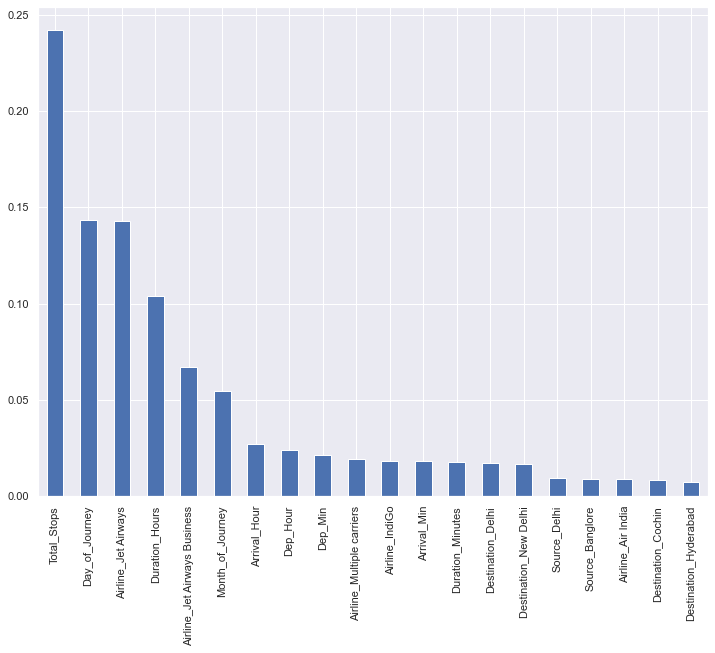

In [51]:
plt.figure(figsize=(12,9))
feature_imp=pd.Series(selection.feature_importances_,index=X.columns)
feature_imp.nlargest(20).plot(kind='bar')

In [52]:
feature_imp

Airline_Air Asia                             0.002064
Airline_Air India                            0.008744
Airline_GoAir                                0.001889
Airline_IndiGo                               0.018466
Airline_Jet Airways                          0.142762
Airline_Jet Airways Business                 0.067081
Airline_Multiple carriers                    0.019317
Airline_Multiple carriers Premium economy    0.000780
Airline_SpiceJet                             0.002856
Airline_Trujet                               0.000118
Airline_Vistara                              0.004845
Airline_Vistara Premium economy              0.000091
Arrival_Hour                                 0.027189
Arrival_Min                                  0.018414
Day_of_Journey                               0.143376
Dep_Hour                                     0.024005
Dep_Min                                      0.021185
Destination_Banglore                         0.001914
Destination_Cochin          

In [53]:
X = X.astype(str).astype(int)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [55]:
X_train.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Arrival_Hour', 'Arrival_Min', 'Day_of_Journey', 'Dep_Hour', 'Dep_Min',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Duration_Hours', 'Duration_Minutes', 'Month_of_Journey',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Total_Stops'],
      dtype='object')

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
! pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score

  Using cached xgboost-1.5.2-py3-none-win_amd64.whl (106.6 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires cycler>=0.10.0, which is not installed.
yellowbrick 1.3.post1 requires matplotlib!=3.0.0,>=2.0.2, which is not installed.
visions 0.7.4 requires attrs>=19.3.0, which is not installed.
visions 0.7.4 requires pandas>=0.25.3, which is not installed.
umap-learn 0.5.2 requires numba>=0.49, which is not installed.
umap-learn 0.5.2 requires tqdm, which is not installed.
thinc 7.4.5 requires tqdm<5.0.0,>=4.10.0, which is not installed.
spacy 2.3.7 requires requests<3.0.0,>=2.13.0, which is not installed.
spacy 2.3.7 requires tqdm<5.0.0,>=4.38.0, which is not installed.
scikit-plot 0.3.7 requires joblib>=0.10, which is not installed.
scikit-plot 0.3.7 requires matplotlib>=1.4.0, which is not installed.
scikit-learn 0.23.2 requires joblib>=0.11, which is not installed.
scikit-learn 0.23.2 requ

In [57]:
regg_models = [LinearRegression(), Lasso(), Ridge(), SVR(),
               RandomForestRegressor(), xgb.XGBRegressor()]

In [58]:
R2_score = []
Score_Train=[]
Score_Test=[]
RMSE = []
MAE=[]
Error=[]
MSE=[]
mean=[]
std=[]
    
#Making ditonary to plot bar graph
# R2_score_df=()
R2_score_dict = {}
RMSE_score_dict = {}
MAE_score_dict = {}
MSE_score_dict={}
Score_Train__dict={}
Score_Test__dict={}
Cross_Valication_score_dict={}

for i in regg_models:    
    train_model = i.fit(X_train, y_train)
    y_pred = train_model.predict(X_test)
    # score = train_model.score(X_test, y_test)
    # r2_score.append(score)
    #R2Score
    r2score=metrics.r2_score(y_test,y_pred) # (coefficient of determination) regression score function
    R2_score.append(r2score)
    #Score training dataset
    scoretrain=train_model.score(X_train,y_train)
    Score_Train.append(scoretrain)
    #Score training dataset
    scoretest=train_model.score(X_test,y_test)
    Score_Test.append(scoretest)
    
    #Normaized RMSE
    rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))/(max(y)-min(y))
    RMSE.append(rmse)   
    #MSE
    mse = metrics.mean_squared_error(y_test, y_pred)
    MSE.append(mse)   
    #MAE
    mae=metrics.mean_absolute_error(y_test,y_pred)
    MAE.append(mae)
    #Cross validation score
    cvs=cross_val_score(i,X,y,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))
    #Error
    # errr = [((y_pred[i]-y_test[i])/(y_test[i])) for i in range(0,len(y_test))]
    # errr = [((y_prediction[i]-actual[i])/(actual[i])) for i in range(0,len(y_test))]
    # Error.append(errr)    



print("                                         Training Data \n","="*100)
print("r2_score")
print("-"*40,'\n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',R2_score[i])
    R2_score_dict.update({regg_models[i].__class__.__name__: R2_score[i]})

print('-'*100,'\n')
print("Score Train")
print("-"*40,'\n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',Score_Train[i])
    Score_Train__dict.update({regg_models[i].__class__.__name__:Score_Train[i]})

print('-'*100,'\n')
print("Score Test")
print("-"*40,'\n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',Score_Test[i])
    Score_Test__dict.update({regg_models[i].__class__.__name__:Score_Test[i]})
    
print('-'*100,'\n')
print("Normalized RMSE")
print("-"*40,'\n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',RMSE[i])
    RMSE_score_dict.update({regg_models[i].__class__.__name__:RMSE[i]})

print('-'*100,'\n')
print("MSE")
print("-"*40,'\n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',MSE[i])
    MSE_score_dict.update({regg_models[i].__class__.__name__:MSE[i]})

print('-'*100,'\n')
print("MAE")
print("-"*40,'\n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',MAE[i])
    MAE_score_dict.update({regg_models[i].__class__.__name__ :MAE[i]})


print('-'*100,'\n')
print('________________Cross Validation Score________________ \n')
print("-"*40,'\n')
for i in range(len(regg_models)):
    print(regg_models[i].__class__.__name__ ,':',mean[i])
    Cross_Valication_score_dict.update({regg_models[i].__class__.__name__ :MAE[i]})

C:\Users\prana\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20832158.44655609, tolerance: 18182450.07652315
  model = cd_fast.enet_coordinate_descent(
C:\Users\prana\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28564833.83205414, tolerance: 18188685.694065303
  model = cd_fast.enet_coordinate_descent(
C:\Users\prana\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\prana\anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.I

                                         Training Data 
r2_score
---------------------------------------- 

LinearRegression : 0.619917594254104
Lasso : 0.619700528618171
Ridge : 0.6192638430418819
SVR : 0.004193868064652828
RandomForestRegressor : 0.801168580768128
XGBRegressor : 0.8481599071572186
---------------------------------------------------------------------------------------------------- 

Score Train
---------------------------------------- 

LinearRegression : 0.6241796061354631
Lasso : 0.6239441735823266
Ridge : 0.6226144208981809
SVR : 9.173156943498295e-05
RandomForestRegressor : 0.9536217128637111
XGBRegressor : 0.9356888855382043
---------------------------------------------------------------------------------------------------- 

Score Test
---------------------------------------- 

LinearRegression : 0.619917594254104
Lasso : 0.619700528618171
Ridge : 0.6192638430418819
SVR : 0.004193868064652828
RandomForestRegressor : 0.801168580768128
XGBRegressor : 0.84815990715

In [59]:
from sklearn.model_selection import RandomizedSearchCV

In [60]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
reg_rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)          
rf_random.fit(X_train,y_train)
rf_random.best_params_
pred = rf_random.predict(X_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.9s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.0s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.0s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.2min finished


In [61]:
print("R2score:",metrics.r2_score(y_test,pred)) # (coefficient of determination) regression score function
#Score training dataset
print("scoretrain:",rf_random.score(X_train,y_train))
#Score training dataset
print("scoretest",rf_random.score(X_test,y_test))
#Normaized RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test,pred))/(max(y)-min(y))
print("Normaized RMSE:", rmse)
#MSE
print("MSE", metrics.mean_squared_error(y_test, pred))
#MAE
print("MAE:",metrics.mean_absolute_error(y_test,pred))

R2score: 0.8123208498416612
scoretrain: -2244985.8377713794
scoretest -3868635.2804299393
Normaized RMSE: 0.025296575871457998
MSE 3868635.2804299393
MAE: 1152.4411753426102


In [62]:
pickle.dump(rf_random, open('pranav_rf_model.pkl','wb'))
